In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
r = 0.02
tau = 5 
K = 300
P0 = 150

In [19]:
dt = 0.1
T = 200 
t = np.linspace(0, T, int(T/dt) + 1)

In [20]:
def f(P, P_delayed):
    return r * P * (1 - P_delayed / K)

In [21]:
P = np.zeros(len(t))
P[0] = P0
history = [P0] * int(tau / dt)

In [22]:
for i in range(1, len(t)):
    if i < len(history):
        P_delayed = history[-1]  
    else:
        P_delayed = P[i - int(tau / dt)]  
    
    k1 = f(P[i-1], P_delayed)
    k2 = f(P[i-1] + k1 * dt / 2, P_delayed)
    k3 = f(P[i-1] + k2 * dt / 2, P_delayed)
    k4 = f(P[i-1] + k3 * dt, P_delayed)
    
    P[i] = P[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    
    history.append(P[i])
    if len(history) > int(tau / dt):
        history.pop(0)

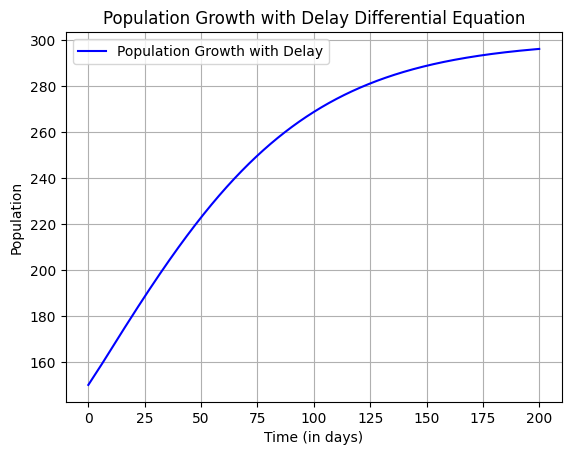

In [23]:
plt.plot(t, P, label='Population Growth with Delay', color='blue')
plt.xlabel('Time (in days)')
plt.ylabel('Population')
plt.title('Population Growth with Delay Differential Equation')
plt.legend()
plt.grid()
plt.show()